# Matplotlib and Seaborn #

In this homework assignment you will work with Konza data to gain insight into nitrogen flow on Konza prairie.

This is the data set you will be working with

http://doi.org/10.6073/pasta/654104fb27d0cdc87f77394a035efc85



Start by doing all of your imports. You will need Pandas and Matplotlib

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")
pd.options.mode.chained_assignment = None

Import your data into a pandas dataframe, make sure the data is appropriately labeled. You should be importing the data via the web and not your hard drive.

In [72]:
konza_df = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-knz.43.6&entityid=002ae57d114e82ff8e156def61fe0a9a")
konza_df

Datacode  Rectype  RecYear  RecMonth  RecDay Watershed Type Amount  \
0       NBP01        1     1982         3      19      n01b    b   20.1   
1       NBP01        1     1982         4       7      n01b    b    NaN   
2       NBP01        1     1982         4       7      n04d    b    NaN   
3       NBP01        1     1982         4       7      001d    b    NaN   
4       NBP01        1     1982         4      29      n04d    b   24.2   
...       ...      ...      ...       ...     ...       ...  ...    ...   
6076    NBP01        1     2019        12      16      00HQ    b    3.4   
6077    NBP01        1     2019        12      30      020B    b     22   
6078    NBP01        1     2019        12      30      R20B    b   21.5   
6079    NBP01        1     2019        12      30      N01B    b     24   
6080    NBP01        1     2019        12      30      00HQ    b   21.4   

        NO3  LimitNO3    NH4  LimitNH4    TPN  LimitTPN   SRP  LimitSRP   TPP  \
0       NaN       NaN    NaN       NaN    NaN       NaN   NaN       NaN   NaN   
1       NaN       NaN    NaN       NaN   1895       NaN   NaN       NaN   NaN   
2       NaN       NaN    NaN       NaN   2306       NaN   NaN       NaN   NaN   
3       NaN       NaN    NaN       NaN   1670       NaN   NaN       NaN   NaN   
4       NaN       NaN    NaN       NaN   1223       NaN   NaN       NaN   NaN   
...     ...       ...    ...       ...    ...       ...   ...       ...   ...   
6076  720.8       NaN    NaN       NaN    NaN       NaN   NaN       NaN   NaN   
6077  124.9       NaN  317.2       NaN  438.2       NaN  12.4       NaN  22.4   
6078    166       NaN  338.3       NaN    451       NaN   9.4       NaN  14.3   
6079  186.4       NaN  337.7       NaN    558       NaN   8.9       NaN  11.5   
6080  206.4       NaN  450.3       NaN    738       NaN   7.3       NaN   9.6   

      LimitTPP               Comments  
0          NaN                    NaN  
1          NaN                    NaN  
2          NaN                    NaN  
3          NaN                    NaN  
4          NaN                    NaN  
...        ...                    ...  
6076       NaN                    NaN  
6077       NaN  rain=191227-28; srpx2  
6078       NaN                  srpx2  
6079       NaN                  srpx2  
6080       NaN                    NaN  

[6081 rows x 19 columns]

In the following cells you should do a basic exploration of the data and dataframe using Pandas. Your biggest challenge here will be to clean the data up and only look at ONE water shed over time. Do basic exploration and slice the data up by watershed.

In [122]:
konza_df.describe()
konza_trimmed_df = konza_df[['RecYear','RecMonth','NO3','NH4']]
konza_years_df = konza_trimmed_df[['RecYear','NO3']]
#gigatrim_df = konza_period_df.iloc[800:850]
#gigatrim_df
#konza_trimmed_df["RecPeriod"] = konza_trimmed_df[["RecYear","RecMonth"]].astype(str).agg('-'.join,axis=1)
konza_trimmed_df['RecMonth'] = konza_trimmed_df['RecMonth'].astype(str).str.zfill(2)

konza_trimmed_df["RecPeriod"] = konza_trimmed_df["RecYear"].astype(str) + "." + konza_trimmed_df["RecMonth"].astype(str)



konza_period_df = konza_trimmed_df[['RecYear','RecPeriod','NO3','NH4']]
#konza_period_df = konza_trimmed_df[['RecPeriod','NO3']]


konza_period_df = konza_period_df.mask(konza_period_df.eq('NaN')).dropna()
konza_period_df = konza_period_df.mask(konza_period_df.eq('.')).dropna()
konza_period_df
#konza_period_df = konza_period_df.groupby(['RecPeriod','NO3']).mean()
konza_period_df = konza_period_df.reset_index()
konza_period_df = konza_period_df[['RecYear','RecPeriod','NO3','NH4']]
konza_period_df
#konza_period_df = konza_period_df.groupby(by=konza_period_df.columns,axis=1).mean()
#konza_period_df

#(df.groupby(['cluster', 'org'], as_index=False).mean().groupby('cluster')['time'].mean())
#gigatrim_df = konza_period_df.iloc[800:850]
#gigatrim_df
#konza_period_df = pd.to_numeric(konza_period_df)
#konza_period_df.to_frame()

konza_period_df['NO3'] = konza_period_df['NO3'].astype(float)
konza_period_df['NH4'] = konza_period_df['NH4'].astype(float)


konza_period_df = konza_period_df.groupby(['RecPeriod']).mean()

#konza_period_df.sort_values(by=['RecPeriod'])
#konza_period_df['NO3']
konza_period_df = pd.DataFrame(data=konza_period_df)
konza_period_df.reset_index(inplace=True)
konza_period_df

RecPeriod  RecYear         NO3         NH4
0     1982.05     1982  205.583333  324.333333
1     1982.06     1982  521.222222  670.222222
2     1982.07     1982  578.900000  686.600000
3     1982.08     1982  756.062500  518.375000
4     1982.09     1982  714.642857  717.428571
..        ...      ...         ...         ...
368   2019.08     2019  193.600000  580.700000
369   2019.09     2019  573.500000  696.125000
370   2019.10     2019  395.675000  481.275000
371   2019.11     2019  126.675000  354.000000
372   2019.12     2019  170.925000  360.875000

[373 rows x 4 columns]

Now we want to create histograms of NO3 concerntration over each of the years. Start by making one graph of all the data and then split the graphs up into chunks of data, say 5 years at a time and then stack them somehow

<ipython-input-77-33d7f6f13749>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  konza_90_99_trimmed_df = konza_90_99_df[konza_years_df.RecYear >= 1990]
<ipython-input-77-33d7f6f13749>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  konza_00_09_trimmed_df = konza_00_09_df[konza_years_df.RecYear >= 2000]


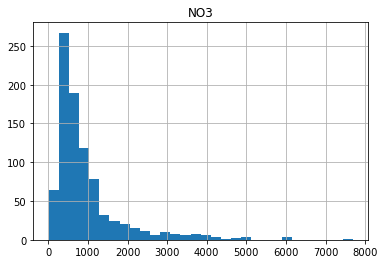

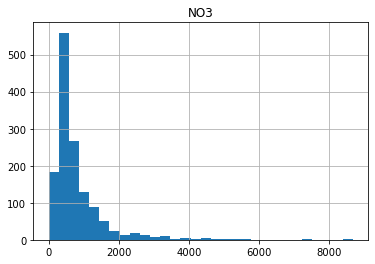

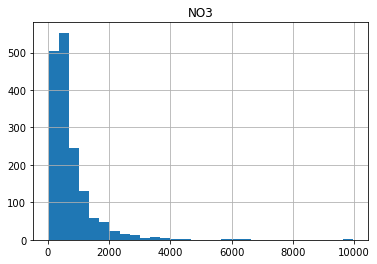

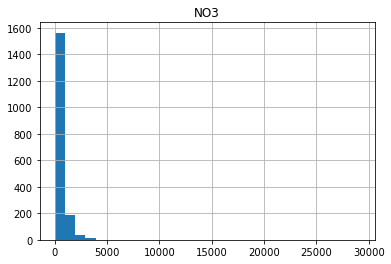

In [77]:

konza_years_df = konza_years_df.mask(konza_years_df.eq('NaN')).dropna()
konza_years_df = konza_years_df.mask(konza_years_df.eq('.')).dropna()
konza_years_df

konza_82_89_df = konza_years_df[konza_years_df.RecYear <= 1989]
konza_90_99_df = konza_years_df[konza_years_df.RecYear <= 1999]
konza_00_09_df = konza_years_df[konza_years_df.RecYear <= 2009]
konza_10_19_df = konza_years_df[konza_years_df.RecYear <= 2019]

konza_82_89_trimmed_df = konza_82_89_df
konza_90_99_trimmed_df = konza_90_99_df[konza_years_df.RecYear >= 1990]
konza_00_09_trimmed_df = konza_00_09_df[konza_years_df.RecYear >= 2000]
konza_10_19_trimmed_df = konza_10_19_df[konza_years_df.RecYear >= 2010]

konza_82_89_trimmed_df['NO3'] = pd.to_numeric(konza_82_89_trimmed_df['NO3'])
konza_90_99_trimmed_df['NO3'] = pd.to_numeric(konza_90_99_trimmed_df['NO3'])
konza_00_09_trimmed_df['NO3'] = pd.to_numeric(konza_00_09_trimmed_df['NO3'])
konza_10_19_trimmed_df['NO3'] = pd.to_numeric(konza_10_19_trimmed_df['NO3'])


hist_82_89 = konza_82_89_trimmed_df.hist(bins=30, column='NO3')


hist_90_99 = konza_90_99_trimmed_df.hist(bins=30, column='NO3')


hist_00_09 = konza_00_09_trimmed_df.hist(bins=30, column='NO3')


hist_10_19 = konza_10_19_trimmed_df.hist(bins=30, column='NO3')

Now we want to look at NO3 trends on a monthly basis by year. I.e. for each of the months with data, make a histogram of the data over time. Secondarily, do a time series analysis of the NO3 trends by month over time. What can you conclude about the trends?

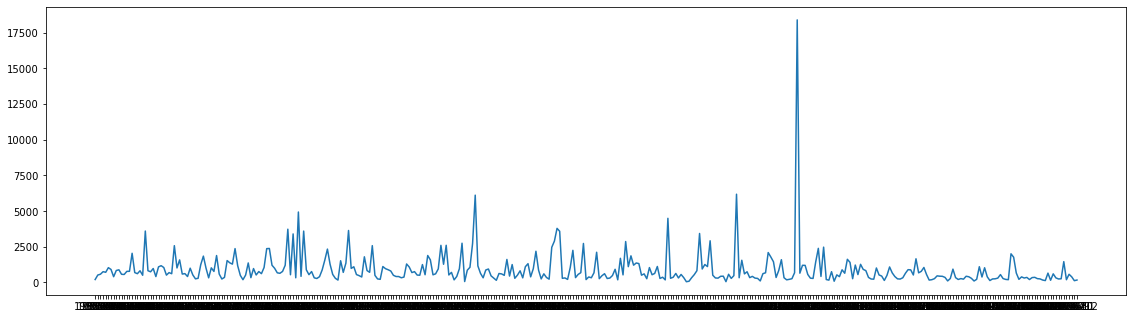

In [78]:
konza_period_df
konza_period_df
#hist_total = konza_period_df.hist(bins=30, column='RecPeriod')

rec_column = konza_period_df['RecPeriod'].tolist()
NO3_column = konza_period_df['NO3'].tolist()

#konza_period_df['RecPeriod']
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,1])
#ax =ax.bar(rec_column, NO3_column)

ax =ax.plot(rec_column, NO3_column)
#That's the entire dataset as a time series, but is pretty unreadable. Let's look at a specific year.

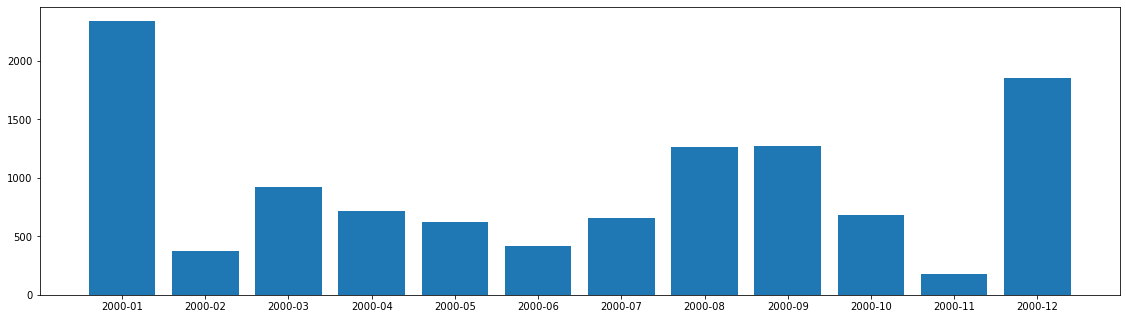

In [64]:
konza_2000_df = konza_period_df.loc[konza_period_df['RecYear'] == 2000]

konza_2000_df = konza_2000_df.reset_index()
konza_2000_df = konza_2000_df[["RecPeriod", "RecYear", "NO3"]]
konza_2000_df

rec_column_2 = konza_2000_df['RecPeriod'].tolist()
NO3_column_2 = konza_2000_df['NO3'].tolist()

konza_2000_df
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,1])
ax =ax.bar(rec_column_2, NO3_column_2)

#This is the trend for the year 2000

Now use a box and whiskers plot to look at NO3 vs NH4 amounts by year over time.


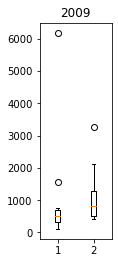

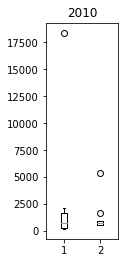

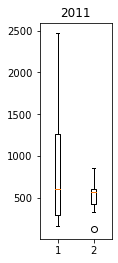

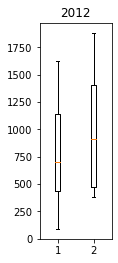

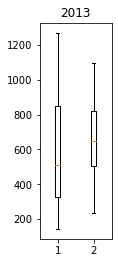

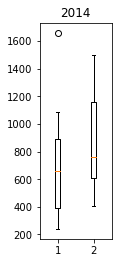

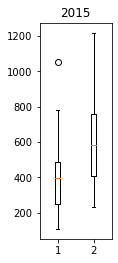

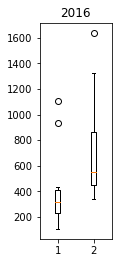

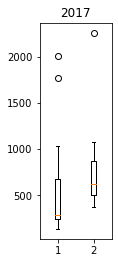

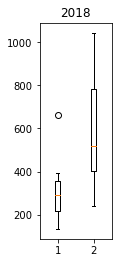

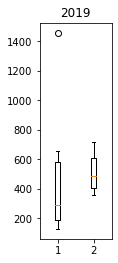

In [119]:
konza_period_df



#boxplot = konza_period_df.boxplot(column=konza_period_df['NO3'])

#fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(2, 8), sharey=True)

for x in range (2009,2020):
    single_year_data_df = konza_period_df[konza_period_df.RecYear == x]
    NO3_column = single_year_data_df['NO3'].tolist()
    NH4_column = single_year_data_df['NH4'].tolist()

    #single_year_data_df.boxplot(column=['NO3','NH4'])
    data = [NO3_column,NH4_column]
    fig= plt.figure(figsize =(1, 3))
    ax = fig.add_axes([0,0,1,1])
    ax.set_title(x)
    bp = ax.boxplot(data)
    
    
    #axs[0, x].boxplot(NO3_column, labels=['NO3'])
    #axs[0, x].set_title(x,fontsize=fs)
    #single_year_data_df.boxplot(column=['NO3','NH4'])
    
#This is just from 2009 to 2020, but the range can be changed easily

Using Seaborn, perform a relational analysis of NO3 and NH4 over time. Are they correlated?

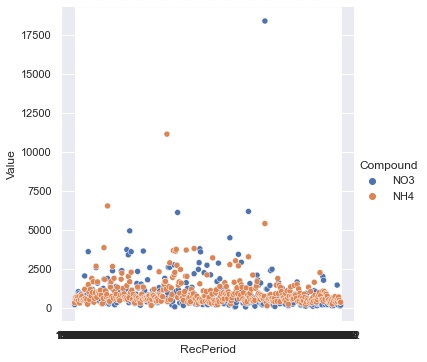

In [152]:
konza_period_df


konza_NO3_values_df = pd.DataFrame()

konza_NO3_values_df = konza_period_df[['RecPeriod','NO3']]
konza_NO3_values_df = konza_NO3_values_df.rename(columns={"NO3":"Value"})
konza_NO3_values_df['Compound'] = 'NO3'
konza_NO3_values_df

konza_NH4_values_df = konza_period_df[['RecPeriod','NH4']]
konza_NH4_values_df = konza_NH4_values_df.rename(columns={"NH4":"Value"})
konza_NH4_values_df['Compound'] = 'NH4'
konza_NH4_values_df

konza_compounds_df = pd.concat([konza_NO3_values_df,konza_NH4_values_df])
konza_compounds_df = konza_compounds_df.reset_index()

konza_compounds_df = konza_compounds_df[["RecPeriod", "Value", "Compound"]]
konza_compounds_df

sns.relplot(x="RecPeriod", y="Value", hue="Compound", data=konza_compounds_df);


Using Seaborn and its clustermap, make a heatmap of July NO3 and NH4 concentrations in each of the watersheds

ValueError: could not convert string to float: 'NO3'

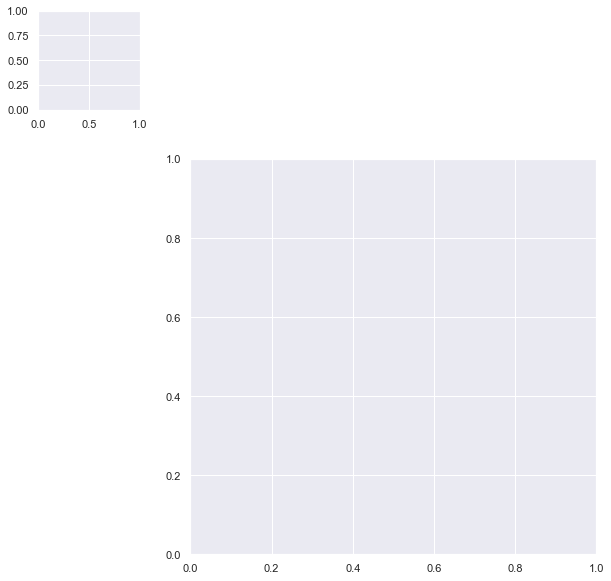

In [153]:
sns.clustermap(konza_compounds_df)

<AxesSubplot:xlabel='Compound', ylabel='RecYear'>

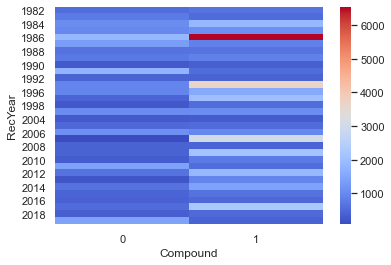

In [171]:

konza_trimmed_df = konza_trimmed_df.mask(konza_trimmed_df.eq('NaN')).dropna()
konza_trimmed_df = konza_trimmed_df.mask(konza_trimmed_df.eq('.')).dropna()
konza_trimmed_df.reset_index()
konza_trimmed_df

konza_July_df = konza_trimmed_df[konza_trimmed_df.RecMonth == '07']
konza_July_df

konza_NO3_values_July_df = konza_July_df[['RecYear','NO3']]
konza_NO3_values_July_df = konza_NO3_values_July_df.rename(columns={"NO3":"Value"})
konza_NO3_values_July_df['Compound'] = 0
konza_NO3_values_July_df

konza_NH4_values_July_df = konza_July_df[['RecYear','NH4']]
konza_NH4_values_July_df = konza_NH4_values_July_df.rename(columns={"NH4":"Value"})
konza_NH4_values_July_df['Compound'] = 1
konza_NH4_values_July_df

konza_compounds_July_df = pd.concat([konza_NO3_values_July_df,konza_NH4_values_July_df])
konza_compounds_July_df = konza_compounds_July_df.reset_index()

konza_compounds_July_df = konza_compounds_July_df[["RecYear", "Value", "Compound"]]

konza_compounds_July_df['RecYear'] = pd.to_numeric(konza_compounds_July_df['RecYear'])
konza_compounds_July_df['Value'] = pd.to_numeric(konza_compounds_July_df['Value'])
konza_compounds_July_df['Compound'] = pd.to_numeric(konza_compounds_July_df['Compound'])
konza_compounds_July_df

fp = konza_compounds_July_df.pivot_table(index='RecYear', columns='Compound', values='Value')
fp


sns.heatmap(fp, cmap='coolwarm')
#I hope I did this right, and that this is what you wanted